# Deep Learning Model of Multi-Class Classification

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.datasets import mnist

In [2]:
# Import MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Describe shapes
print('MNIST Dataset Shapes:')
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

MNIST Dataset Shapes:
X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [4]:
# Check first element of train data
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Check labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

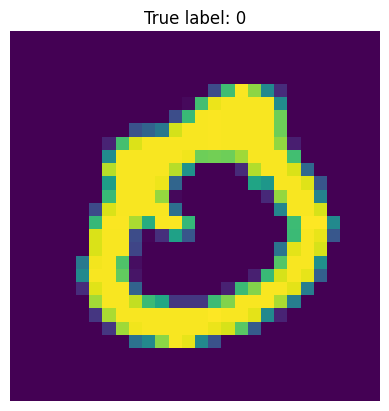

In [6]:
# See random image
def show_random_image():
  '''
  Plots random trainig uimage and true label.
  '''

  index = random.randint(0, len(X_train))

  plt.imshow(X_train[index])
  plt.title(f'True label: {y_train[index]}')
  plt.axis(False);

show_random_image()

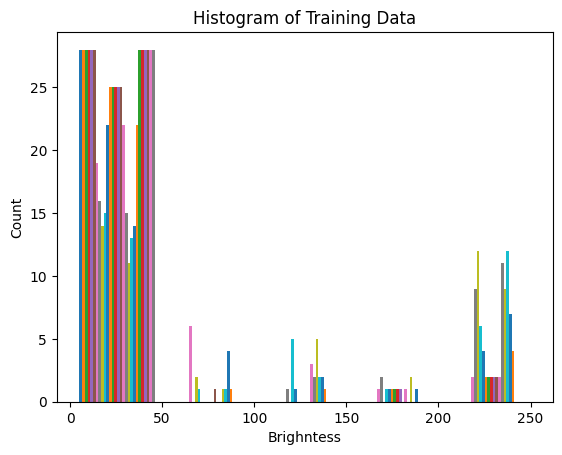

In [7]:
# Plot historam of random image
def show_random_histogram(bins = 5):
  '''
  Plots histogram of random training image.
  '''
  index = random.randint(0, len(X_train))
  plt.hist(X_train[index], bins = bins)
  plt.title('Histogram of Training Data')
  plt.xlabel('Brighntess')
  plt.ylabel('Count')
  plt.show();


show_random_histogram()

In [17]:
# See amount of training data
labels = pd.DataFrame(y_train)
labels.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [18]:
# Normalize our dataset
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [20]:
# Once more check shapes
X_train_norm[0].shape, y_train[0].shape

((28, 28), ())

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compie the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_1 = model_1.fit(X_train_norm,
                        y_train,
                        epochs = 20,
                        validation_data = (X_test_norm, y_test),
                        callbacks = [lr_scheduler],
                        verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2567 - accuracy: 0.9273 - val_loss: 0.1322 - val_accuracy: 0.9604 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1131 - accuracy: 0.9664 - val_loss: 0.1153 - val_accuracy: 0.9655 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0802 - accuracy: 0.9751 - val_loss: 0.0777 - val_accuracy: 0.9755 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0788 - val_accuracy: 0.9758 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9831 - val_loss: 0.0869 - val_accuracy: 0.9742 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0484 - accuracy: 0.9839 - val_loss: 0.0876 - val_accuracy: 0.9758 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 6

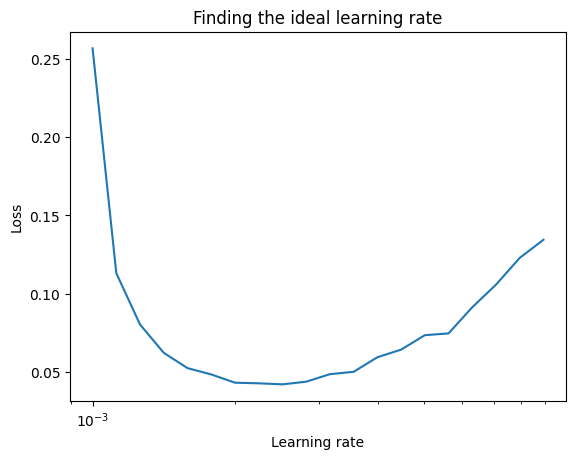

In [26]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(20)/20))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compie the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(X_train_norm,
                        y_train,
                        epochs = 6,
                        validation_data = (X_test_norm, y_test),
                        verbose = 1)

Epoch 1/6
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2541 - accuracy: 0.9268 - val_loss: 0.1348 - val_accuracy: 0.9618
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1129 - accuracy: 0.9670 - val_loss: 0.1139 - val_accuracy: 0.9647
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0819 - val_accuracy: 0.9754
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.0827 - val_accuracy: 0.9755
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0900 - val_accuracy: 0.9727
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0793 - val_accuracy: 0.9772


In [30]:
# Summarize the model
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Make predictions
y_probs = model_2.predict(X_test_norm)
y_preds = y_probs.argmax(axis = 1)
y_preds[:5]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4])

In [32]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[ 971,    0,    1,    1,    1,    0,    2,    0,    3,    1],
       [   0, 1126,    3,    0,    0,    1,    3,    0,    2,    0],
       [   7,    3, 1004,    2,    3,    0,    3,    4,    6,    0],
       [   2,    0,    5,  988,    0,    5,    0,    5,    3,    2],
       [   1,    0,    2,    1,  959,    2,    6,    0,    1,   10],
       [   3,    0,    0,    6,    1,  868,    8,    0,    3,    3],
       [   3,    2,    0,    1,    4,    2,  945,    0,    1,    0],
       [   1,    6,   11,    2,    1,    0,    0,  996,    2,    9],
       [  10,    1,    3,    9,    5,    7,    2,    4,  927,    6],
       [   2,    2,    0,    3,    5,    4,    1,    3,    1,  988]])

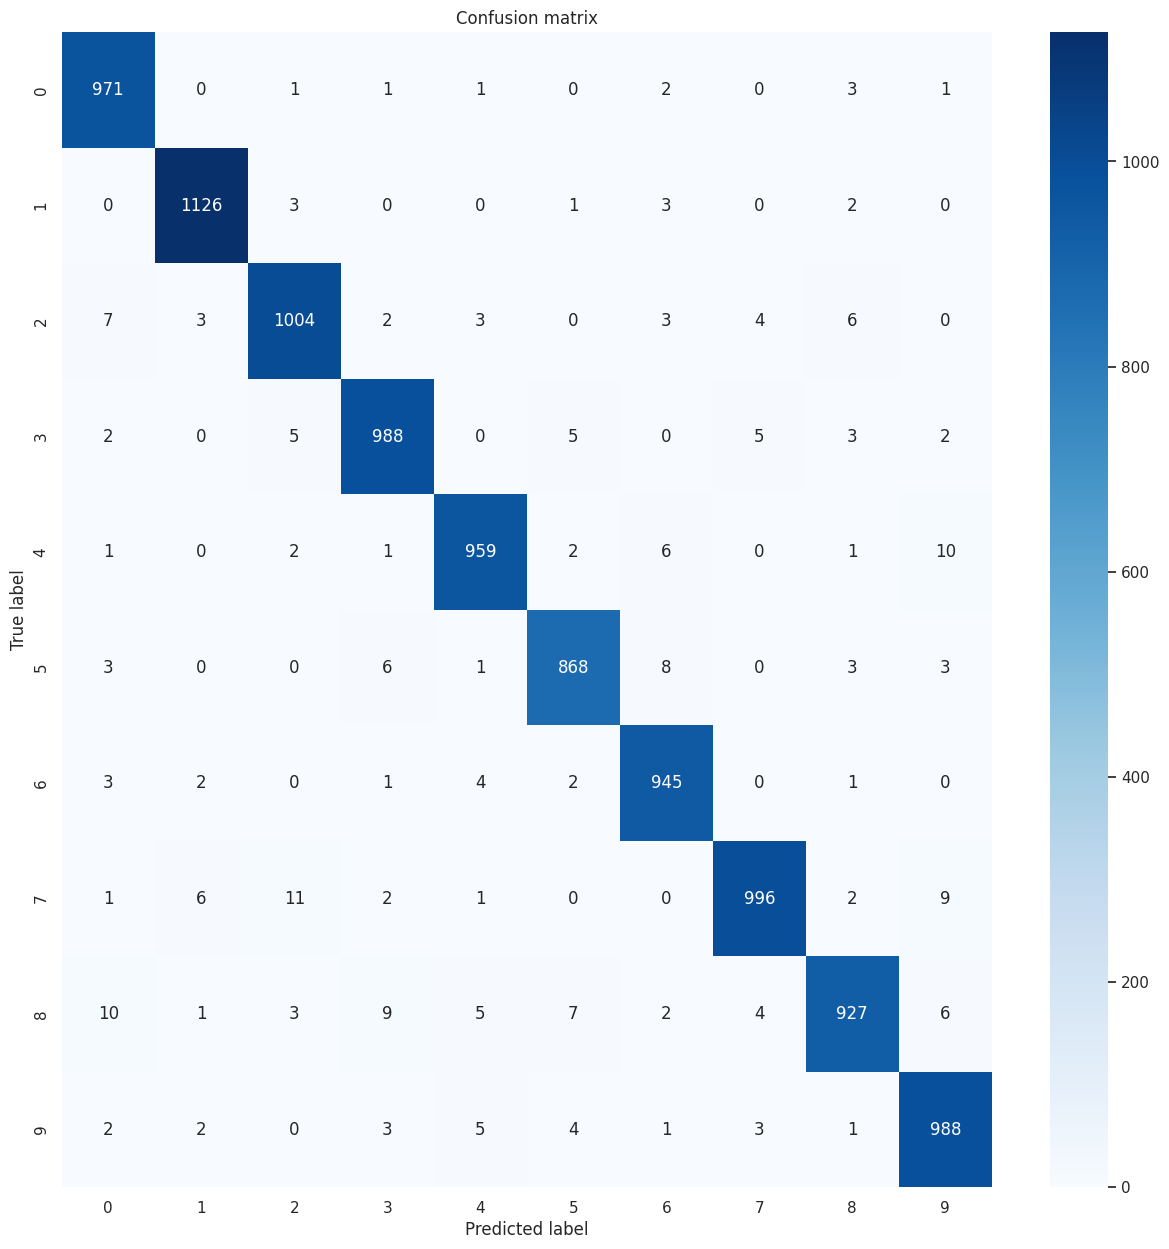

In [33]:
# Visualize confusion matrix
import seaborn as sns

sns.set(font_scale = 1)

def plot_confusion_matrix(y_true, y_preds):
  '''
  Plots a confusion matrix.
  '''
  fig, ax = plt.subplots(figsize = (15, 15))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = True,
                   cmap = 'Blues',
                   fmt = 'g')
  plt.title('Confusion matrix')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

plot_confusion_matrix(y_test, y_preds)

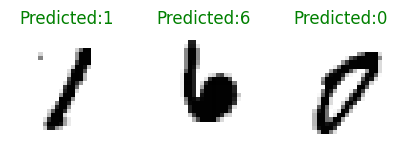

In [41]:
# Plot 3 random images and predictions
plt.figure(figsize = (5, 15))

for i in range(3):
  ax = plt.subplot(1, 3, i+1)
  random_index = random.choice(range(len(X_test_norm)))
  plt.imshow(X_test_norm[random_index], cmap = plt.cm.binary)
  if y_preds[random_index] == y_test[random_index]:
    color = 'green'
  else:
    color = 'red'
  plt.title(f'Predicted:{y_preds[random_index]}', color = color)
  plt.axis(False);

In [42]:
# Create classification raport
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
# Save model
model_2.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
